<a href="https://colab.research.google.com/github/richy1996/Springboard_272_Relax/blob/main/Relax_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [3]:
da = pd.read_csv("takehome_user_engagement.csv")
da

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


In [5]:
db = pd.read_csv("takehome_users.csv", encoding='latin-1')
db

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


- First things first, create adopted user

In [6]:
da.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [10]:
da.time_stamp = pd.to_datetime(da.time_stamp)
da

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


In [44]:
da['date'] = pd.to_datetime(da.time_stamp.dt.date)
da

,time_stamp,user_id,visited,date
0,2014-04-22 03:53:30,1,1,2014-04-22
1,2013-11-15 03:45:04,2,1,2013-11-15
2,2013-11-29 03:45:04,2,1,2013-11-29
3,2013-12-09 03:45:04,2,1,2013-12-09
4,2013-12-25 03:45:04,2,1,2013-12-25
...,...,...,...,...
207912,2013-09-06 06:14:15,11996,1,2013-09-06
207913,2013-01-15 18:28:37,11997,1,2013-01-15
207914,2014-04-27 12:45:16,11998,1,2014-04-27
207915,2012-06-02 11:55:59,11999,1,2012-06-02


In [66]:
# do the thing for one user and then expand

# user_id = 2
def is_adopted_user(td):
    # td = da[da.user_id == user_id]
    # td.head(2)
    td = td[['visited', 'date']].drop_duplicates()
    # td.head(2)
    start, end = td.date.min(), td.date.max()
    # start, end
    dates = pd.date_range(start, end).to_frame(index=False, name='date')
    # dates.head(2)
    ta = dates.merge(td, on='date', how='left').fillna(0)
    # ta.head(2)
    return ta['visited'].rolling(7).sum().max() >= 3

In [67]:
res = da.groupby('user_id').apply(is_adopted_user).reset_index(name='adopted_user')
res

,user_id,adopted_user
0,1,False
1,2,True
2,3,False
3,4,False
4,5,False
...,...,...
8818,11996,False
8819,11997,False
8820,11998,False
8821,11999,False


In [68]:
res['adopted_user'].value_counts()

False    7226
True     1597
Name: adopted_user, dtype: int64

In [132]:
1597 / 8823

0.18100419358494843

- Ok so now we have our target variable
- We can join the two

In [72]:
db.rename(columns={'object_id': 'user_id'}, inplace=True)

In [74]:
data = res.merge(db, on='user_id')
data.head(2)

,user_id,adopted_user,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,False,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,True,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0


In [76]:
# Extract features that might be relevant

target = 'adopted_user'
feats = ['creation_time', 'adopted_user', 'creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id', 'email']

df = data[feats]
df.head(2)

,creation_time,adopted_user,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email
0,2014-04-22 03:53:30,False,GUEST_INVITE,1,0,11,10803.0,AugustCClausen@yahoo.com
1,2013-11-15 03:45:04,True,ORG_INVITE,0,0,1,316.0,MatthewPoole@gustr.com


- Ideas, creation_source, mailing list and marketing drip, org_id, invited_by_user_id will be useful for predicting adopted users
- Maybe the email domain and creation time will be useful

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 8822
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   creation_time               8823 non-null   object 
 1   adopted_user                8823 non-null   bool   
 2   creation_source             8823 non-null   object 
 3   opted_in_to_mailing_list    8823 non-null   int64  
 4   enabled_for_marketing_drip  8823 non-null   int64  
 5   org_id                      8823 non-null   int64  
 6   invited_by_user_id          4776 non-null   float64
 7   email                       8823 non-null   object 
dtypes: bool(1), float64(1), int64(3), object(3)
memory usage: 560.1+ KB


In [80]:
df['domain'] = df['email'].str.extract(r'@([^.]+)\.com')
df['domain'].value_counts()

<ipython-input-80-5afe1d538053>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['domain'] = df['email'].str.extract(r'@([^.]+)\.com')


gmail         2930
yahoo         1726
jourrapide     883
gustr          842
hotmail        803
              ... 
qwnwx            1
udgug            1
hstsg            1
wjcjo            1
iuxiw            1
Name: domain, Length: 811, dtype: int64

In [83]:
# Extract hour of day and day of week from creation_time
df['hour'] = pd.to_datetime(df['creation_time']).dt.hour
df['day'] = pd.to_datetime(df['creation_time']).dt.dayofweek
df.head(2)

<ipython-input-83-dfff18c1c191>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = pd.to_datetime(df['creation_time']).dt.hour


,creation_time,adopted_user,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email,domain,hour,day
0,2014-04-22 03:53:30,False,GUEST_INVITE,1,0,11,10803.0,AugustCClausen@yahoo.com,yahoo,3,1
1,2013-11-15 03:45:04,True,ORG_INVITE,0,0,1,316.0,MatthewPoole@gustr.com,gustr,3,4


- Group by categoricals and take mean of adopted_user

creation_source


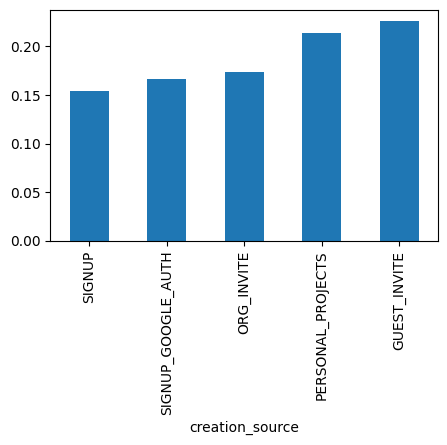


opted_in_to_mailing_list


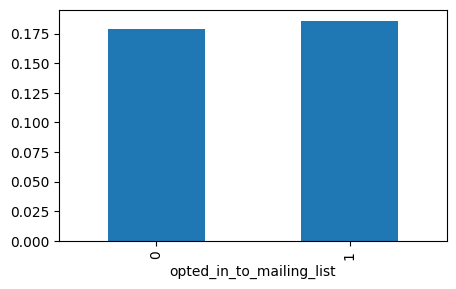


enabled_for_marketing_drip


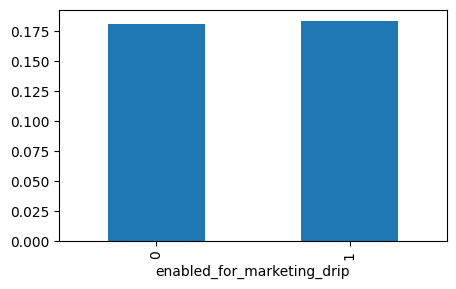


org_id


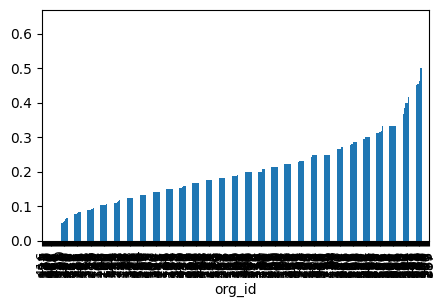


invited_by_user_id


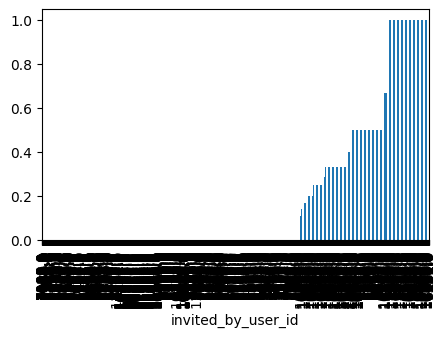


domain


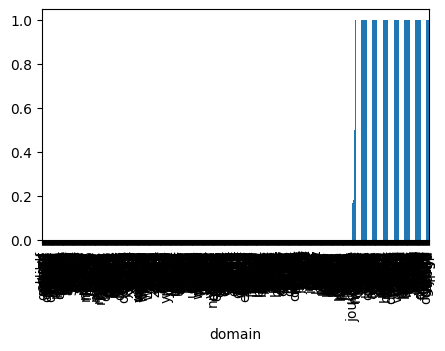


hour


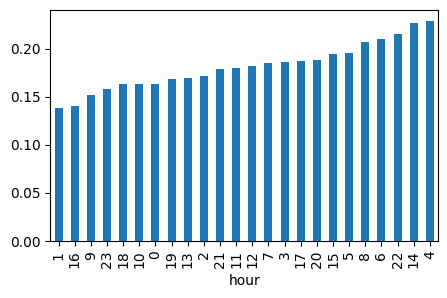


day


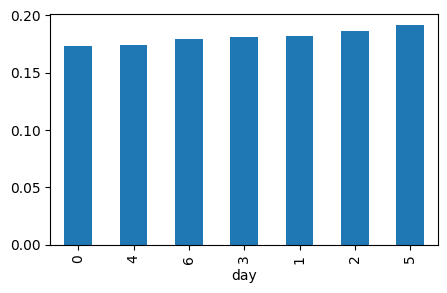

In [95]:
cats = ['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip',
        'org_id', 'invited_by_user_id', 'domain', 'hour', 'day']

# group by cat in cats and do a bar plot of mean of adopted_user

for cat in cats:
    # cat='creation_source'
    print(cat)
    plt.figure(figsize=(5, 3))
    df.groupby(cat)[target].mean().sort_values().plot(kind='bar')
    plt.show()
    print()

- Ok so creation source seems to valuable
- The mailing list and marketing drip seem useless
- The organization Id is useful as well as the inviter
- Domain, hour and day don't seem useful. gonna dig into these a bit more

In [104]:
cat = 'domain'
group = df.groupby(cat)[target].agg(['mean', 'count'])

group = group.sort_values('count', ascending=False)

group.head(6)

,mean,count
domain,,
gmail,0.183959,2930
yahoo,0.151217,1726
jourrapide,0.184598,883
gustr,0.169834,842
hotmail,0.245330,803
mumdc,0.500000,2


<Axes: xlabel='domain'>

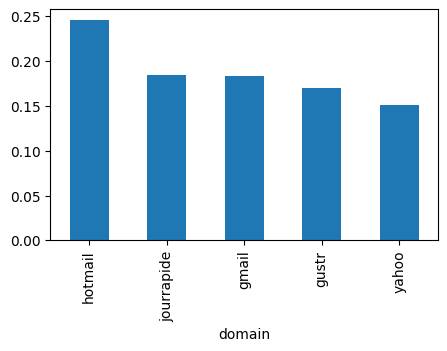

In [113]:
# Taking the top 5 by count and sorting by mean and plotting

plt.figure(figsize=(5, 3))
group.sort_values('count', ascending=False).head(5) \
    .sort_values('mean', ascending=False)['mean'].plot(kind='bar')

<Axes: xlabel='hour'>

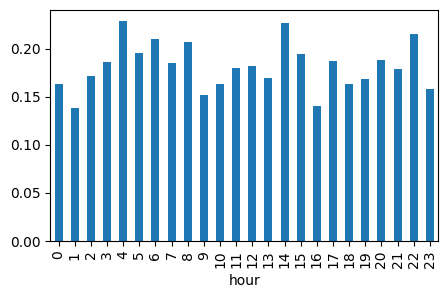

In [114]:
cat = 'hour'
plt.figure(figsize=(5, 3))
df.groupby(cat)[target].mean().plot(kind='bar')

<Axes: xlabel='day'>

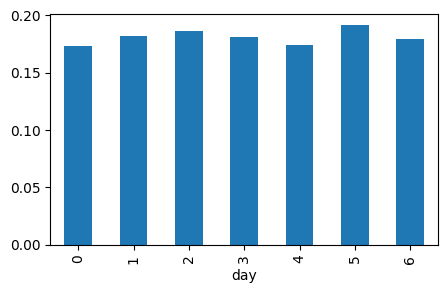

In [115]:
cat = 'day'
plt.figure(figsize=(5, 3))
df.groupby(cat)[target].mean().plot(kind='bar')

- Ok so hour and day are definitely useless
- Domain is probably also useless, the difference is negligible between the top 5 by count and hotmail has the least count of the top 5

- Look into org id and inviter

In [121]:
top_orgs = df.groupby('org_id').count()['adopted_user'].sort_values().tail(20)
top_orgs

org_id
33     47
15     47
20     50
13     50
18     54
11     56
12     57
17     58
14     66
8      67
10     68
5      87
7      88
9      91
6     102
4     122
3     125
2     150
1     172
0     228
Name: adopted_user, dtype: int64

<Axes: xlabel='org_id'>

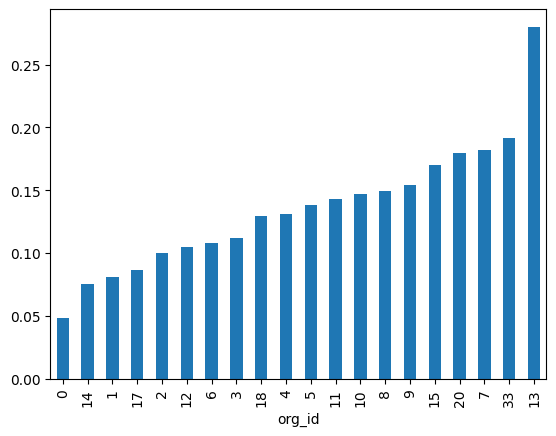

In [126]:
df[df['org_id'].isin(top_orgs.index)].groupby('org_id')['adopted_user'].mean() \
    .sort_values().plot(kind='bar')

- And now for invited_by_user_id

In [129]:
top_user = df.groupby('invited_by_user_id').count()['adopted_user'].sort_values().tail(20)
top_user

invited_by_user_id
4908.0      7
4118.0      7
1400.0      7
7928.0      7
2771.0      7
1525.0      8
6808.0      8
6706.0      8
10628.0     8
4803.0      8
4302.0      8
2354.0      8
2527.0      8
3721.0      8
730.0       8
3261.0      8
10741.0     8
11770.0     9
2308.0      9
4612.0     10
Name: adopted_user, dtype: int64

<Axes: xlabel='invited_by_user_id'>

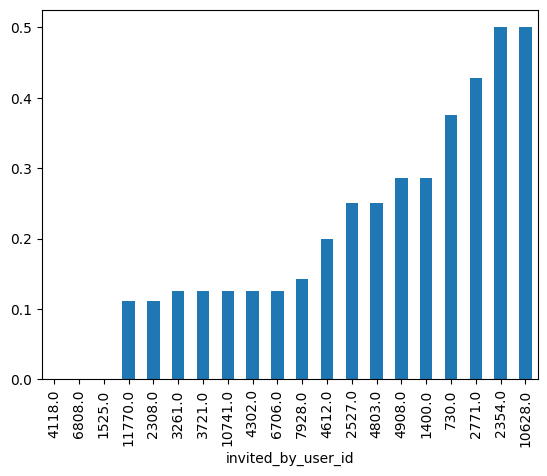

In [131]:
df[df['invited_by_user_id'].isin(top_user.index)].groupby('invited_by_user_id')['adopted_user'].mean() \
    .sort_values().plot(kind='bar')

## Conclusion

- Group, inviter, and creation source seem to be best.